In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import os
import gc

import re
from nltk.corpus import stopwords
# import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

In [3]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


# EDA

In [4]:
data=pd.read_csv(r'/gdrive/MyDrive/Colab Notebooks/Datasets/Quora_train.csv')

In [5]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [7]:
data.shape

(404290, 6)

In [18]:
data.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

0    255027
1    149263
Name: is_duplicate, dtype: int64


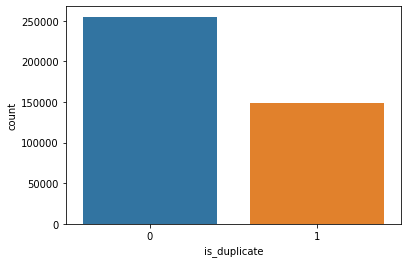

In [31]:
#checking imbalance of data

print(data.is_duplicate.value_counts())

sns.countplot(data=data,x=data.is_duplicate)
plt.show()

In [37]:
#Calculation ratio of each class

print('{}% Question pairs are similar class is_duplicate = 0'.format(data.is_duplicate.value_counts()[0]/data.shape[0]*100))

print('{}% Question pairs are not similar class is_duplicate = 1'.format(data.is_duplicate.value_counts()[1]/data.shape[0]*100))

# We can se there is slight imbalance in data

63.08021469737069% Question pairs are similar class is_duplicate = 0
36.9197853026293% Question pairs are not similar class is_duplicate = 1


### Checking for unique questions

In [67]:
#merging qids1 and qids2

total_qids=pd.Series(data.qid1.tolist() + data.qid2.tolist())

unique_qids = len(np.unique(total_qids))
print('Number of unique qids are {}\n'.format(unique_qids))

qids_morethan_onetime=(total_qids.value_counts() > 1).sum()
print('Number of unique questions that appear more than one time: {} ({}%)\n'.format(qs_morethan_onetime,qids_morethan_onetime/unique_qids*100))

print('Max number of times a single question is repeated: {}\n'.format(np.max(total_qids.value_counts())))

#80% of questions are unique.

Number of unique qids are 537933

Number of unique questions that appear more than one time: 111780 (20.77953945937505%)

Max number of times a single question is repeated: 157



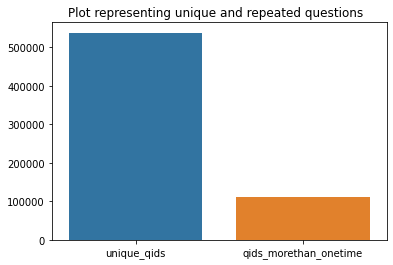

In [72]:
#Plot representing unique and repeated questions 
plt.title ("Plot representing unique and repeated questions  ")
sns.barplot(x=['unique_qids','qids_morethan_onetime'],y=[unique_qids,qids_morethan_onetime])
plt.show()

### Checking for Repeated pairs of duplicate questions

In [80]:
#checking whether there are any repeated pair of questions

pair_duplicates = data[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()

print ("Number of duplicate questions",(pair_duplicates).shape[0] - data.shape[0])

Number of duplicate questions 0


### Number of occurrences of each question

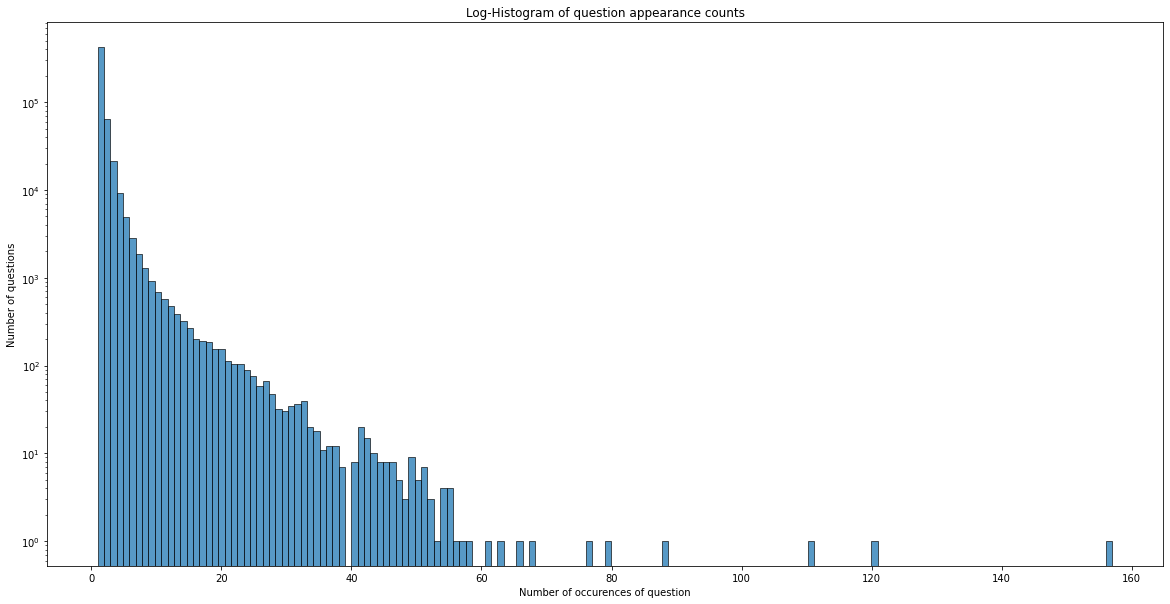

In [88]:
plt.figure(figsize=(20, 10))

sns.histplot(x=total_qids.value_counts(),bins=160)

#Using LOG scale
plt.yscale('log')

plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')
plt.show()

### Checking and printing null rows

In [89]:
data.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [97]:
data[data.isnull().any(axis=1)]

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


In [100]:
# Filling the null values with ' '
data=data.fillna('')
data.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64